<a href="https://colab.research.google.com/github/Harshbhatt2409/Sentiment-Analysis-Using-Naive-Bayes/blob/main/a1872953_ANLP_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**a1872953** 

**Harsh Alpesh Bhatt**

**Applied Natural Language Processing Assignment 1**

**Task: Building a sentiment analysis system with Naive Bayes**

In [ ]:
# Importing the required libraries

import pandas as pd
import re as re

### 1. Importing Dataset and doing text preprocessing 

In [ ]:
df = pd.read_csv('/content/imdb_master.csv')

In [ ]:
df.head()

,Unnamed: 0,type,review,label,file
0,0,test,Once again Mr. Costner has dragged out a movie...,neg,0_2.txt
1,1,test,This is an example of why the majority of acti...,neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who...",neg,10001_1.txt
3,3,test,Not even the Beatles could write songs everyon...,neg,10002_3.txt
4,4,test,Brass pictures (movies is not a fitting word f...,neg,10003_3.txt


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   type        100000 non-null  object
 2   review      100000 non-null  object
 3   label       100000 non-null  object
 4   file        100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df.shape

(100000, 5)

In [ ]:
df.describe()

,Unnamed: 0
count,100000.000000
mean,49999.500000
std,28867.657797
min,0.000000
25%,24999.750000
50%,49999.500000
75%,74999.250000
max,99999.000000


In [ ]:
#dropping the file column 
df.drop("file", axis =1, inplace = True)

In [ ]:
#dropping the Unnamed column
df.drop("Unnamed: 0", axis =1, inplace = True)

In [ ]:
df.head()

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,neg
1,test,This is an example of why the majority of acti...,neg
2,test,"First of all I hate those moronic rappers, who...",neg
3,test,Not even the Beatles could write songs everyon...,neg
4,test,Brass pictures (movies is not a fitting word f...,neg


In [ ]:
df.shape

(100000, 3)

unsup    50000
neg      25000
pos      25000
Name: label, dtype: int64


<Axes: ylabel='label'>

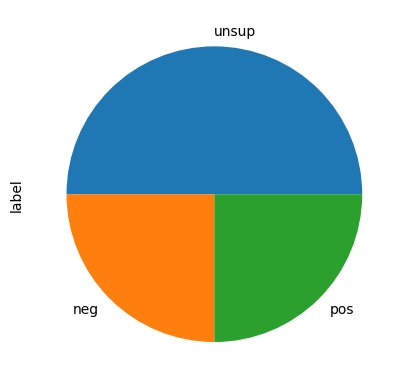

In [ ]:
# counting and plotting the 3 labels pos, neg and unsup in pie format
print(df["label"].value_counts())
df["label"].value_counts().plot(kind="pie")

<Axes: >

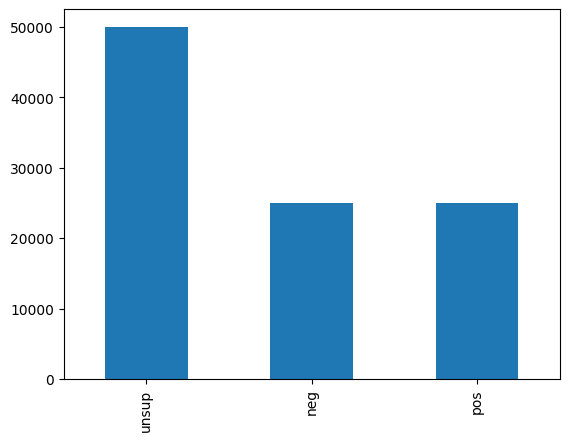

In [ ]:
df["label"].value_counts().plot(kind="bar")

Now we can see that there are almost 50000 unsup samples. We will now remove them as they are neither positive or negative.

In [ ]:
#dropping the unlabbeled samples i.e. unsup
df = df.drop(df[df.label == 'unsup'].index)

neg    25000
pos    25000
Name: label, dtype: int64


<Axes: ylabel='label'>

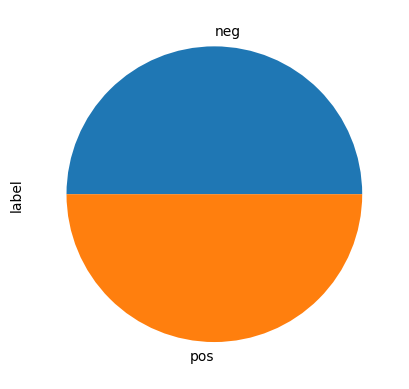

In [ ]:
#counting and plotting for only positive and negative samples
print(df["label"].value_counts())
df["label"].value_counts().plot(kind="pie")

<Axes: >

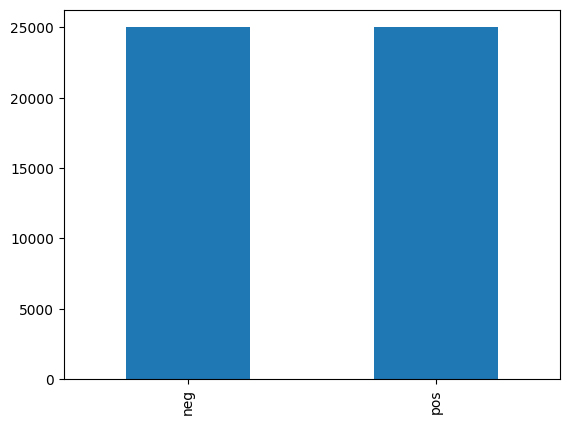

In [ ]:
df["label"].value_counts().plot(kind="bar")

Now we will replace the negative samples with 0 and positive samples with 1 so that we can perform better operations on them. 

In [ ]:
df['label'].replace({'pos':1, 'neg':0}, inplace=True)

In [ ]:
df

,type,review,label
0,test,Once again Mr. Costner has dragged out a movie...,0
1,test,This is an example of why the majority of acti...,0
2,test,"First of all I hate those moronic rappers, who...",0
3,test,Not even the Beatles could write songs everyon...,0
4,test,Brass pictures (movies is not a fitting word f...,0
...,...,...,...
49995,train,"Seeing as the vote average was pretty low, and...",1
49996,train,"The plot had some wretched, unbelievable twist...",1
49997,train,I am amazed at how this movie(and most others ...,1
49998,train,A Christmas Together actually came before my t...,1


In [ ]:
df.columns

Index(['type', 'review', 'label'], dtype='object')

Now that we have checked that all the cleaning and modifications are done on tha data we will move on to the text preprocessing part

In [ ]:
#example of negative review
df['review'][0]

"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in."

In [ ]:
#example of positive review
df['review'][1]

"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and Ice Cube, who've each proven many times over that they are capable of acting, and acting well. Don't bother with this one, go see New Jack City, Ricochet or watch New York Undercover for Ice-T, or Boyz n the Hood, Higher Learning or Friday for Ice Cube and see the real deal. Ice-T's horribly cliched dialogue alone makes this film grate at the teeth, and I'm still wondering what the heck Bill Paxton was doing in this film? And why the heck does he always play the exact same character? From Aliens onward, every film I've seen with Bill Paxton has him playing the exact same irritating character, and at least in Aliens his character died, which made it somewhat gratifying...<br /><br />Overall, this is second-rate action trash. There are countless better films to see, and if you really want to s

###Text Preprocessing

Now by looking at the above senttences we can look that in our text preprocessing step we will

1. Lower casing of characters

2. Remove Html tags

3. Removing stop words

4. Number removal

5. Special character removal

6. Tokenization

7. Applying Lemmatization for text normalization

In [ ]:
# defining function to convert to lower case
def lower(data):
  return data.lower()

In [ ]:
df['review'] = df['review'].apply(lower)

In [ ]:
df['review'][1]

"this is an example of why the majority of action films are the same. generic and boring, there's really nothing worth watching here. a complete waste of the then barely-tapped talents of ice-t and ice cube, who've each proven many times over that they are capable of acting, and acting well. don't bother with this one, go see new jack city, ricochet or watch new york undercover for ice-t, or boyz n the hood, higher learning or friday for ice cube and see the real deal. ice-t's horribly cliched dialogue alone makes this film grate at the teeth, and i'm still wondering what the heck bill paxton was doing in this film? and why the heck does he always play the exact same character? from aliens onward, every film i've seen with bill paxton has him playing the exact same irritating character, and at least in aliens his character died, which made it somewhat gratifying...<br /><br />overall, this is second-rate action trash. there are countless better films to see, and if you really want to s

Now we have converted all the characters to lower case

In [ ]:
# defining function to remove HTML tags
def html_tags(data):
  clean = re.compile("<.*?>")
  return re.sub(clean, '', data)

In [ ]:
df['review'] = df['review'].apply(html_tags)

In [ ]:
df['review'][1]

"this is an example of why the majority of action films are the same. generic and boring, there's really nothing worth watching here. a complete waste of the then barely-tapped talents of ice-t and ice cube, who've each proven many times over that they are capable of acting, and acting well. don't bother with this one, go see new jack city, ricochet or watch new york undercover for ice-t, or boyz n the hood, higher learning or friday for ice cube and see the real deal. ice-t's horribly cliched dialogue alone makes this film grate at the teeth, and i'm still wondering what the heck bill paxton was doing in this film? and why the heck does he always play the exact same character? from aliens onward, every film i've seen with bill paxton has him playing the exact same irritating character, and at least in aliens his character died, which made it somewhat gratifying...overall, this is second-rate action trash. there are countless better films to see, and if you really want to see this one,

Now we have removed all the HTML tags

Dropping Numbers

In [ ]:
# Removing all Numerical Values from the reviews
def number_removal(data):
  return ''.join(filter(lambda x: not x.isdigit(), data))

In [ ]:
df['review'][1]

"this is an example of why the majority of action films are the same. generic and boring, there's really nothing worth watching here. a complete waste of the then barely-tapped talents of ice-t and ice cube, who've each proven many times over that they are capable of acting, and acting well. don't bother with this one, go see new jack city, ricochet or watch new york undercover for ice-t, or boyz n the hood, higher learning or friday for ice cube and see the real deal. ice-t's horribly cliched dialogue alone makes this film grate at the teeth, and i'm still wondering what the heck bill paxton was doing in this film? and why the heck does he always play the exact same character? from aliens onward, every film i've seen with bill paxton has him playing the exact same irritating character, and at least in aliens his character died, which made it somewhat gratifying...overall, this is second-rate action trash. there are countless better films to see, and if you really want to see this one,

As we can see there is numbers at the end of this review. we will now use the function to remove them.

In [ ]:
df['review'] = df['review'].apply(number_removal)

In [ ]:
df['review'][1]

"this is an example of why the majority of action films are the same. generic and boring, there's really nothing worth watching here. a complete waste of the then barely-tapped talents of ice-t and ice cube, who've each proven many times over that they are capable of acting, and acting well. don't bother with this one, go see new jack city, ricochet or watch new york undercover for ice-t, or boyz n the hood, higher learning or friday for ice cube and see the real deal. ice-t's horribly cliched dialogue alone makes this film grate at the teeth, and i'm still wondering what the heck bill paxton was doing in this film? and why the heck does he always play the exact same character? from aliens onward, every film i've seen with bill paxton has him playing the exact same irritating character, and at least in aliens his character died, which made it somewhat gratifying...overall, this is second-rate action trash. there are countless better films to see, and if you really want to see this one,

Special Character Removal

In [ ]:
#function to remove special characters
def special_character_removal(data):
  g = ''
  for t in data:
    if t.isalnum():
      g = g + t
    else:
      g = g + ' '
  return g

In [ ]:
df['review'] = df['review'].apply(special_character_removal)

In [ ]:
df['review'][1]

'this is an example of why the majority of action films are the same  generic and boring  there s really nothing worth watching here  a complete waste of the then barely tapped talents of ice t and ice cube  who ve each proven many times over that they are capable of acting  and acting well  don t bother with this one  go see new jack city  ricochet or watch new york undercover for ice t  or boyz n the hood  higher learning or friday for ice cube and see the real deal  ice t s horribly cliched dialogue alone makes this film grate at the teeth  and i m still wondering what the heck bill paxton was doing in this film  and why the heck does he always play the exact same character  from aliens onward  every film i ve seen with bill paxton has him playing the exact same irritating character  and at least in aliens his character died  which made it somewhat gratifying   overall  this is second rate action trash  there are countless better films to see  and if you really want to see this one 

Now we will tackle with the removal of all the stop words.

In [ ]:
#function to remove stop words
#we will use the nltk library for this process
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#specifing the predefined stopwords library to find stopwords in english language
stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


We will now see the use of stopwords in the review below. we will now remove them

In [ ]:
df['review'][1]

'this is an example of why the majority of action films are the same  generic and boring  there s really nothing worth watching here  a complete waste of the then barely tapped talents of ice t and ice cube  who ve each proven many times over that they are capable of acting  and acting well  don t bother with this one  go see new jack city  ricochet or watch new york undercover for ice t  or boyz n the hood  higher learning or friday for ice cube and see the real deal  ice t s horribly cliched dialogue alone makes this film grate at the teeth  and i m still wondering what the heck bill paxton was doing in this film  and why the heck does he always play the exact same character  from aliens onward  every film i ve seen with bill paxton has him playing the exact same irritating character  and at least in aliens his character died  which made it somewhat gratifying   overall  this is second rate action trash  there are countless better films to see  and if you really want to see this one 

In [ ]:
df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [ ]:
df['review'][1]

'example majority action films generic boring really nothing worth watching complete waste barely tapped talents ice ice cube proven many times capable acting acting well bother one go see new jack city ricochet watch new york undercover ice boyz n hood higher learning friday ice cube see real deal ice horribly cliched dialogue alone makes film grate teeth still wondering heck bill paxton film heck always play exact character aliens onward every film seen bill paxton playing exact irritating character least aliens character died made somewhat gratifying overall second rate action trash countless better films see really want see one watch judgement night practically carbon copy better acting better script thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quite'

#Naive Bayes

In [ ]:
df

,type,review,label
0,test,mr costner dragged movie far longer necessary ...,0
1,test,example majority action films generic boring r...,0
2,test,first hate moronic rappers could nt act gun pr...,0
3,test,even beatles could write songs everyone liked ...,0
4,test,brass pictures movies fitting word really some...,0
...,...,...,...
49995,train,seeing vote average pretty low fact clerk vide...,1
49996,train,plot wretched unbelievable twists however chem...,1
49997,train,amazed movie others average stars lower crappy...,1
49998,train,christmas together actually came time raised j...,1


In [ ]:
data_columns = df.columns
print(data_columns)

Index(['type', 'review', 'label'], dtype='object')


In [ ]:
#defining a function to split data 
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
lemmatization = WordNetLemmatizer()
stemming = PorterStemmer()
detoken = TreebankWordDetokenizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def splitting(df, stemm, lemma):
    column = ['type', 'review', 'label']
    train_set = pd.DataFrame(columns=column)
    test_set = pd.DataFrame(columns=column)
    def functrain_test(df, train_set, test_set):
      return 
    for z, row in df.iterrows():
        text = row.review
        format = row.type
        token = []
        def func(df, ste, lem):
          return ste+lem
        for w in nltk.word_tokenize(text):
            token.append(w)
        # we will now check for the condition where lemmatization will be true
        if lemma == True:
            lemma_data = []
            for w in token:
                lemma_data.append(lemmatization.lemmatize(w))
        if lemma == False:
            lemma_data = token
        #now we have checked for the lemmatization 
        def stefunc(df, ste):
          return 
        # Now lets check for the condition where Stemming is true
        #in this condition we will first check if stemm is True 
        #then we will store this value in a new list and then via for loop check whether it belongs to lemma data
        if stemm == True:
            stem_data = []
            for w in lemma_data:
                stem_data.append(stemming.stem(w))
        if stemm == False:
            stem_data = lemma_data
        
        row.review = detoken.detokenize(stem_data)
        def funcv(df, stemmin, lemmi):
          return df + lemma
        if format == 'train':
            train_set = train_set.append(row)
        elif format == 'test':
            test_set = test_set.append(row)
        else:
            pass
    
    train_set = train_set.drop(columns ='type')
    test_set = test_set.drop(columns='type')

    return train_set, test_set

In [ ]:
#function to split data different then above used tokenizers as here we only split them by the seperation
def data_tokenizing(data):
  return re.split("\W+", data)

In [ ]:
df['review'][0]

'mr costner dragged movie far longer necessary aside terrific sea rescue sequences care characters us ghosts closet costner character realized early forgotten much later time care character really care cocky overconfident ashton kutcher problem comes kid thinks better anyone else around shows signs cluttered closet obstacle appears winning costner finally well past half way point stinker costner tells us kutcher ghosts told kutcher driven best prior inkling foreshadowing magic could keep turning hour'

In [ ]:
df['review'][1]

'example majority action films generic boring really nothing worth watching complete waste barely tapped talents ice ice cube proven many times capable acting acting well bother one go see new jack city ricochet watch new york undercover ice boyz n hood higher learning friday ice cube see real deal ice horribly cliched dialogue alone makes film grate teeth still wondering heck bill paxton film heck always play exact character aliens onward every film seen bill paxton playing exact irritating character least aliens character died made somewhat gratifying overall second rate action trash countless better films see really want see one watch judgement night practically carbon copy better acting better script thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quite'

In [ ]:
#function to count words
def count_words(words):
  word_count = {}
  for w in words:
    word_count[w] = word_count.get(w, 0.0) + 1.0
  return word_count

In [ ]:
#function to fit the dataset 
import math
items = {}
log_classes = {}
word_counts = {}
vocab = set()

def fitting(item, labels):
  #assigning variable to store length of the labels
  h = len(labels)
  #assigning variables to store the the positive labels and negative labels
  #For positive labels p
  p = (1 for label in labels if label == 1)
  #For negative label n
  n = (1 for label in labels if label == 0)
  #storing the summation of all the positive and negative reviews
  items['pos'] = sum(p)
  items['neg'] = sum(n)
  #now to handle smaller classes
  log_classes['pos'] = math.log(items['pos']/ h)
  log_classes['neg'] = math.log(items['neg']/ h)
  def func(df, log_classes):
    return log_classes['pos'] + log_classes['neg']
  word_counts['pos'] = {}
  word_counts['neg'] = {}
  def word_counting(df, word_counts):
    return word_counts['pos'] + word_counts['neg']
  #We will now count the words and keep them in one bag
  for i, j in zip(item, labels):
      if j == 1:
          o = 'pos'
      else:
          o = 'neg'
      counts = count_words(data_tokenizing(i)) 
      def countw(df, stema):
        return stema+1
      for w, wcount in counts.items():
          if w not in vocab:
              vocab.add(w)
          g=0
          if w not in word_counts[o]:
              word_counts[o][w] = 0.0
          word_counts[o][w] = word_counts[o][w] + wcount
# defininig a function for prediction
def prediction(item):
    result = []
    for i in item:
        counts = count_words(data_tokenizing(i))
        result_is_positive = 0
        result_is_negative = 0
        counting_words_during_tokenising = 0
        for w, _ in counts.items():
      
            def logfunc(df, log):
              return log + df
            if w not in vocab: continue
            result_is_positive = result_is_positive + math.log( (word_counts['pos'].get(w, 0.0) + 1) / (items['pos'] + len(vocab)) )
            result_is_negative = result_is_negative + math.log( (word_counts['neg'].get(w, 0.0) + 1) / (items['neg'] + len(vocab)) )

        #storing results
        result_is_positive += log_classes['pos']
        result_is_negative += log_classes['neg']

        #if more positive sentiments then we append 1 to final result
        if result_is_positive > result_is_negative:
            result.append(1)
        #if more negative sentiments then we append 0 to final result
        else:
            result.append(0)

    return result

In [ ]:
# defining function to prepare the data for training and testing
def preparation_of_data(train_set, test_set):
  # training set for reviews
  a = train_set.review.tolist()
  # training set for labels
  b = train_set.label.tolist()
  def train_list(df, a, b):
    return a + b
   # testing set for reviews
  c = test_set.review.tolist()
  # testing set for labels
  d = test_set.label.tolist()
  def test_list(df, c, d):
    return c + d
  return a,b,c,d

In [ ]:
# defining function to calculate F1 score
def f1_score(predict, label):
  # now for f1 score we need values of precision and recall
  # to calculate precision and recall we need true positive, true negative, false positive and false negative
  tp=0
  fp=0
  fn=0
  tn=0
  for x in range(len(predict)):
    #true positive
    #when the predicted value is 1 and the label is also 1 then it is said to be true positive
    if predict[x] == 1 and label[x] == 1:
      tp+=1
    #false positive
    #when the predicted value is 1 and the label is not 1 then it is said to be false positive
    if predict[x] == 1 and label[x] == 0:
      fp+=1
     # true negative
    #when the predicted value is 0 and the label is also 0 then it is said to be true negative
    if predict[x] == 0 and label[x] == 0:
      tn+=1
    # false negative
    #when the predicted value is 0 and the label is not 0 then it is said to be false negative
    if predict[x] == 0 and label[x] == 1:
      fn+=1

  print("TP:", tp)
  print("FP:", fp)
  print("TN:", tn)
  print("FN:", fn)

  #to calculate accuracy
  #we know that accuracy = (tp+tn)/(tp+tn+fp+fn)
  accuracy = (tp + tn) / (tp+tn+fp+fn)
  print("Accuracy", accuracy)

  #to calculate precision, true positive value upon all positive values
  #we know that precision = (tp)/(tp+fp)
  precision = tp / (tp+fp)
  print("Precision", precision)

  #to calculate recall true positive upon all the correctly predicted values
  #we know that recall = (tp)/(tp+fn)
  recall = tp / (tp+fn)
  print("Recall", recall)

  #F1Score
  #f1 score = 2(precision*recall)/(precision + recall)
  f1_score = 2 * (precision * recall) / (precision + recall)

  return f1_score

    

###Investigating the impact of different factors

####We will be analyzing the impact of Lemmatization and Stemming

####We will analyse 4 factors in this, we will analysis what happens when Stemming and Lemmatization is False and True on different occasions

#####Factor 1: Stemming and Lemmatization both is False

In [ ]:
training_set, testing_set = splitting(df, stemm = False, lemma = False)
a,b,c,d = preparation_of_data(training_set, testing_set)
print("This is for case 1 where Stemming and Lemmatization both are False")
fitting(a,b)
predict = prediction(c)
print("F1 score:" +str(f1_score(predict, d)))

Streaming output truncated to the last 5000 lines.
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

This is for case 1 where Stemming and Lemmatization both are False
TP: 10823
FP: 2372
TN: 10128
FN: 1677
Accuracy 0.83804
Precision 0.8202349374763168
Recall 0.86584
F1 score:0.8424207044172018


#####Factor 2: we have stemming as False and Lemmatization as True

In [ ]:
training_set, testing_set = splitting(df, stemm = False, lemma = True)
a,b,c,d = preparation_of_data(training_set, testing_set)
print("This is for case 1 where Stemming is False but Lemmatization is True")
fitting(a,b)
predict = prediction(c)
print("F1 score:" +str(f1_score(predict, d)))

Streaming output truncated to the last 5000 lines.
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

This is for case 1 where Stemming is False but Lemmatization is True
TP: 10821
FP: 2410
TN: 10090
FN: 1679
Accuracy 0.83644
Precision 0.8178520142090545
Recall 0.86568
F1 score:0.8410866270257666


#####Factor 3:We will keep Stemming as True and Lemmatization as False

In [ ]:
training_set, testing_set = splitting(df, stemm = True, lemma = False)
a,b,c,d = preparation_of_data(training_set, testing_set)
print("This is for case 1 where Stemming is True but Lemmatization is False")
fitting(a,b)
predict = prediction(c)
print("F1 score:" +str(f1_score(predict, d)))

Streaming output truncated to the last 5000 lines.
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

This is for case 1 where Stemming is True but Lemmatization is False
TP: 10850
FP: 2598
TN: 9902
FN: 1650
Accuracy 0.83008
Precision 0.8068114217727543
Recall 0.868
F1 score:0.8362879605364575


#####Factor 4:We will have Stemming as True and Lemmatization as True 

In [ ]:
training_set, testing_set = splitting(df, stemm = True, lemma = True)
a,b,c,d = preparation_of_data(training_set, testing_set)
print("This is for case 1 where Stemming and Lemmatization both are True")
fitting(a,b)
predict = prediction(c)
print("F1 score:" +str(f1_score(predict, d)))

Streaming output truncated to the last 5000 lines.
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_set = train_set.append(row)
<ipython-input-51-56cbf35103ed>:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

This is for case 1 where Stemming and Lemmatization both are True
TP: 10847
FP: 2598
TN: 9902
FN: 1653
Accuracy 0.82996
Precision 0.8067683153588695
Recall 0.86776
F1 score:0.8361534014260937


Text(0, 0.5, 'Reviews')

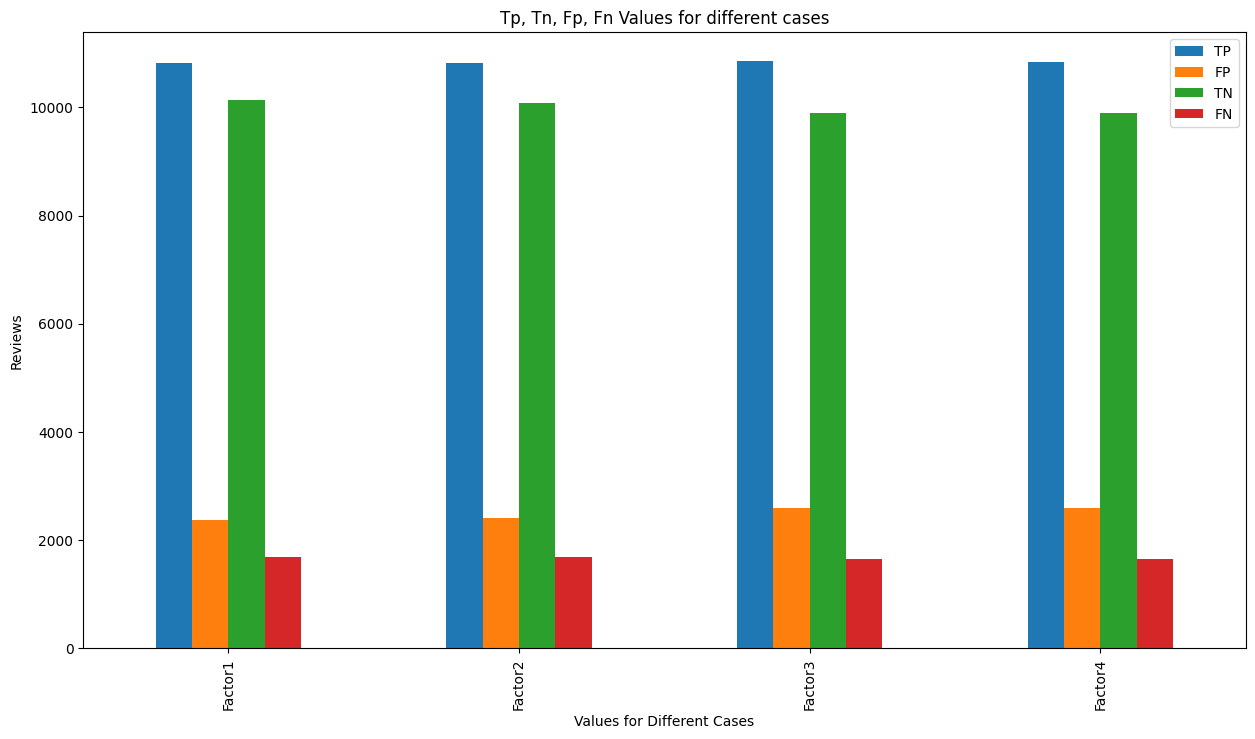

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plotdata = pd.DataFrame({
    "TP":[10823,10821,10850,10847],
    "FP":[2372,2410,2598,2598],
    "TN":[10128,10090,9902,9902],
    "FN":[1677,1679,1650,1653]
    },
    index = ["Factor1", "Factor2", "Factor3", "Factor4"])
plotdata.plot(kind="bar", figsize = (15,8))
plt.title("Tp, Tn, Fp, Fn Values for different cases")
plt.xlabel("Values for Different Cases")
plt.ylabel("Reviews")

Text(0, 0.5, 'Reviews')

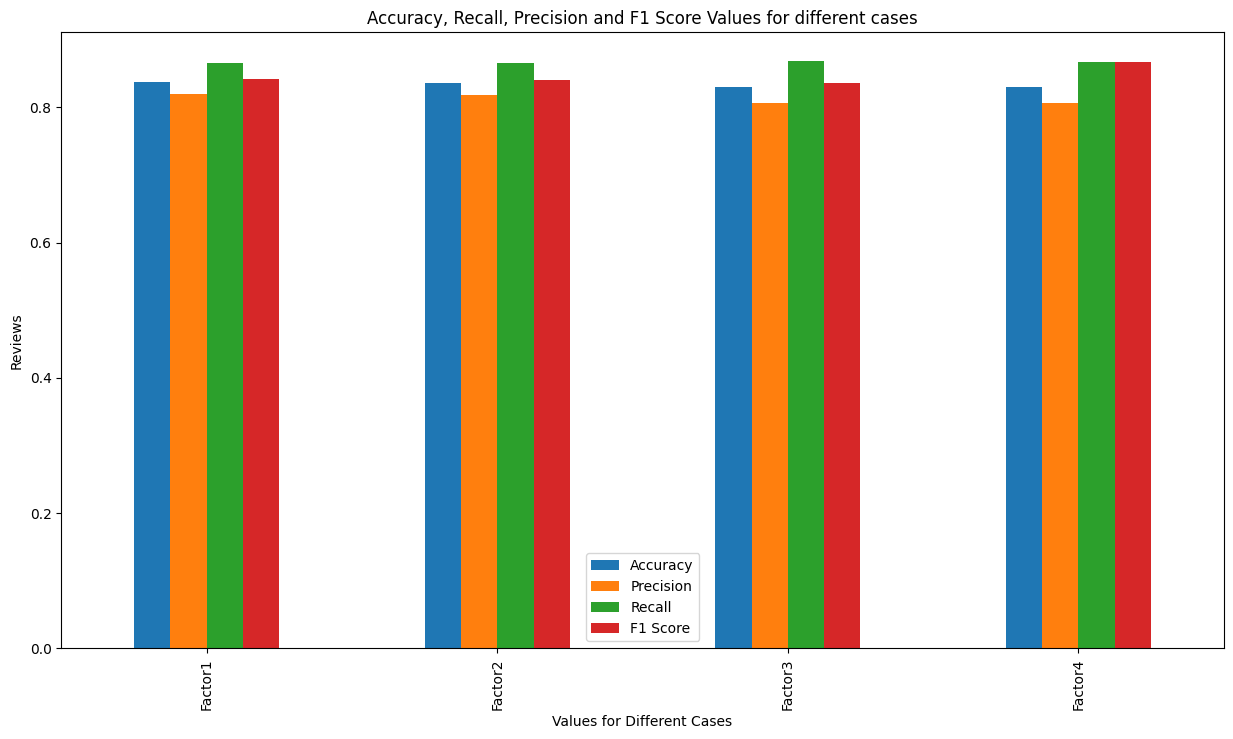

In [ ]:
plotdata = pd.DataFrame({
    "Accuracy":[0.83804,0.83644,0.8300,0.8299],
    "Precision":[0.8202,0.8178,0.8068,0.8067],
    "Recall": [0.8658,0.8656,0.868,0.8677],
    "F1 Score":[0.8424,0.8410,0.8362,0.8677]
    },
    index = ["Factor1", "Factor2", "Factor3", "Factor4"])
plotdata.plot(kind="bar", figsize = (15,8))
plt.title("Accuracy, Recall, Precision and F1 Score Values for different cases")
plt.xlabel("Values for Different Cases")
plt.ylabel("Reviews")   

After analysing the four factors we found out that stemming and lemmatization does affect the dataset as we could achieve higher F1 score when both of them where True

We also found out that for the given dataset, stemming is more related to F1 score as when stemming was True and Lemmatization was False we acheived much higher accuracy then when Stemming was False and Lemmatization was True. 

###We will be analysing the different tokenization inbuilt libraries and how they are different from each other 

##Tokenization

In [ ]:
#Tokenization
# as our review has no @ or any tweets we wont be using TweetTokenizer
# we will be using sent_tokenizer and word_tokenizer
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#using the predefined tokenization library 
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
sentences = sent_tokenize(df['review'][1])
print("\nSentences:\n",len(sentences), sentences)

tokenized_words = word_tokenize(df['review'][0])
print("\nWords:\n",len(tokenized_words), tokenized_words)


Sentences:
 1 ['example majority action films generic boring really nothing worth watching complete waste barely tapped talents ice ice cube proven many times capable acting acting well bother one go see new jack city ricochet watch new york undercover ice boyz n hood higher learning friday ice cube see real deal ice horribly cliched dialogue alone makes film grate teeth still wondering heck bill paxton film heck always play exact character aliens onward every film seen bill paxton playing exact irritating character least aliens character died made somewhat gratifying overall second rate action trash countless better films see really want see one watch judgement night practically carbon copy better acting better script thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quite']

Words:
 73 ['mr', 'costner', 'dragged', 'movie', 'far', 'longer', 'necessary', 'aside', 'terrific', 'sea', 'rescue', 'sequences', 'care', 'characters'

In [ ]:
from nltk.tokenize import  wordpunct_tokenize
punctuation = wordpunct_tokenize(df['review'][1])
print("\nPunctuation:\n", len(punctuation), punctuation)


Punctuation:
 126 ['example', 'majority', 'action', 'films', 'generic', 'boring', 'really', 'nothing', 'worth', 'watching', 'complete', 'waste', 'barely', 'tapped', 'talents', 'ice', 'ice', 'cube', 'proven', 'many', 'times', 'capable', 'acting', 'acting', 'well', 'bother', 'one', 'go', 'see', 'new', 'jack', 'city', 'ricochet', 'watch', 'new', 'york', 'undercover', 'ice', 'boyz', 'n', 'hood', 'higher', 'learning', 'friday', 'ice', 'cube', 'see', 'real', 'deal', 'ice', 'horribly', 'cliched', 'dialogue', 'alone', 'makes', 'film', 'grate', 'teeth', 'still', 'wondering', 'heck', 'bill', 'paxton', 'film', 'heck', 'always', 'play', 'exact', 'character', 'aliens', 'onward', 'every', 'film', 'seen', 'bill', 'paxton', 'playing', 'exact', 'irritating', 'character', 'least', 'aliens', 'character', 'died', 'made', 'somewhat', 'gratifying', 'overall', 'second', 'rate', 'action', 'trash', 'countless', 'better', 'films', 'see', 'really', 'want', 'see', 'one', 'watch', 'judgement', 'night', 'practical

In [ ]:
from nltk.tokenize import TreebankWordTokenizer

Treebank = TreebankWordTokenizer()
treebank = Treebank.tokenize(df['review'][1])
print("\nTreeBankTokenizer:\n", len(treebank), treebank)


TreeBankTokenizer:
 126 ['example', 'majority', 'action', 'films', 'generic', 'boring', 'really', 'nothing', 'worth', 'watching', 'complete', 'waste', 'barely', 'tapped', 'talents', 'ice', 'ice', 'cube', 'proven', 'many', 'times', 'capable', 'acting', 'acting', 'well', 'bother', 'one', 'go', 'see', 'new', 'jack', 'city', 'ricochet', 'watch', 'new', 'york', 'undercover', 'ice', 'boyz', 'n', 'hood', 'higher', 'learning', 'friday', 'ice', 'cube', 'see', 'real', 'deal', 'ice', 'horribly', 'cliched', 'dialogue', 'alone', 'makes', 'film', 'grate', 'teeth', 'still', 'wondering', 'heck', 'bill', 'paxton', 'film', 'heck', 'always', 'play', 'exact', 'character', 'aliens', 'onward', 'every', 'film', 'seen', 'bill', 'paxton', 'playing', 'exact', 'irritating', 'character', 'least', 'aliens', 'character', 'died', 'made', 'somewhat', 'gratifying', 'overall', 'second', 'rate', 'action', 'trash', 'countless', 'better', 'films', 'see', 'really', 'want', 'see', 'one', 'watch', 'judgement', 'night', 'pra

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
textblob = TextBlob(df['review'][1])
print("\nTextBlob:\n", len(textblob), textblob)


TextBlob:
 829 example majority action films generic boring really nothing worth watching complete waste barely tapped talents ice ice cube proven many times capable acting acting well bother one go see new jack city ricochet watch new york undercover ice boyz n hood higher learning friday ice cube see real deal ice horribly cliched dialogue alone makes film grate teeth still wondering heck bill paxton film heck always play exact character aliens onward every film seen bill paxton playing exact irritating character least aliens character died made somewhat gratifying overall second rate action trash countless better films see really want see one watch judgement night practically carbon copy better acting better script thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quite


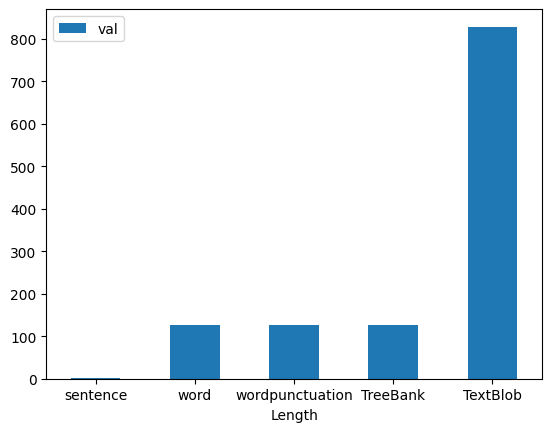

In [ ]:
token = pd.DataFrame({'Length':['sentence', 'word', 'wordpunctuation', 'TreeBank', 'TextBlob'], 'val':[1,126,126,126,829]})
ax = token.plot.bar(x='Length', y='val', rot=0)

Here we can observe how the using different tokenization techniques affects the sentence and how the length of each of these senteces after tokenization differ. This difference in length is because of the how the tokenizer accepts a token, on space, punctuation, etc.

In [ ]:
#stemming 
import nltk 
from nltk.stem import PorterStemmer
post = PorterStemmer()
pstemmer = post.stem(df['review'][1])
print("\nStemming using PorterStemmer:\n", len(pstemmer), pstemmer )


Stemming using PorterStemmer:
 828 example majority action films generic boring really nothing worth watching complete waste barely tapped talents ice ice cube proven many times capable acting acting well bother one go see new jack city ricochet watch new york undercover ice boyz n hood higher learning friday ice cube see real deal ice horribly cliched dialogue alone makes film grate teeth still wondering heck bill paxton film heck always play exact character aliens onward every film seen bill paxton playing exact irritating character least aliens character died made somewhat gratifying overall second rate action trash countless better films see really want see one watch judgement night practically carbon copy better acting better script thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quit


In [ ]:
#lemmatization
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
wnetlemma = wordnet.lemmatize(df['review'][1])
print("\nLemmatization using WordnetLemmatizer:\n", len(wnetlemma), wnetlemma)


Lemmatization using WordnetLemmatizer:
 829 example majority action films generic boring really nothing worth watching complete waste barely tapped talents ice ice cube proven many times capable acting acting well bother one go see new jack city ricochet watch new york undercover ice boyz n hood higher learning friday ice cube see real deal ice horribly cliched dialogue alone makes film grate teeth still wondering heck bill paxton film heck always play exact character aliens onward every film seen bill paxton playing exact irritating character least aliens character died made somewhat gratifying overall second rate action trash countless better films see really want see one watch judgement night practically carbon copy better acting better script thing made worth watching decent hand camera cinematography almost refreshing comes close making horrible film quite
